### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means.  What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.<br>


$$
\text{SD} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$


It measures the variability or spread of individual data points in a dataset around the mean. It tells you how spread out the data points are.If the standard deviation is large, the data points are widely scattered around the mean; if it's small, the data points are closer to the mean.

$$
\text{SEM} = \frac{\text{SD}}{\sqrt{N}}
$$


It measures the precision of the sample mean estimate as an estimate of the population mean. It tells you how much the sample mean would vary if you repeated the experiment many times.

Difference：SD describes the spread of individual data points in the sample, while SEM describes the precision of the sample mean as an estimate of the population mean. SEM is always smaller than SD for the same dataset, and it decreases as the sample size N increases.

CHATGPT LINK:https://chatgpt.com/share/66ff1302-1f58-800d-a85c-e547bfb2ba36

### 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this.  How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.<br>

1. Gather the Necessary Information
Sample Mean (The average of your sample data.
Standard Error of the Mean (SEM): This is the estimated standard deviation of the sample mean
$\text{SEM} = \frac{\sigma}{\sqrt{n}}$
2. Calculate the Margin of Error (ME)
The margin of error is the amount added or subtracted from the sample mean to create the confidence interval. 
$\text{Margin of Error (ME)} = Z \times \text{SEM}$
3. Construct the Confidence Interval
The confidence interval is constructed as:$
\left( \bar{X} - \text{ME}, \bar{X} + \text{ME} \right)$


https://chatgpt.com/share/66ff189a-aec4-800d-b4b1-9f0941854c68

### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.<br>

1. Generate Bootstrap Samples
From your original dataset, create a large number of bootstrap resamples. A typical number of bootstrap samples is 1,000 or more.
Each bootstrap sample is obtained by randomly sampling from the original data. Each bootstrap sample should be the same size as the original dataset.
2. Compute Bootstrap Sample Means
For each of the bootstrap samples, compute the sample mean. This will give you a distribution of bootstrapped sample means.
3. Sort the Bootstrap Sample Means
Once you have the distribution of bootstrapped means, sort the bootstrapped means in ascending order.
4. Determine the Percentiles
To create a 95% confidence interval, you want to exclude the lower 2.5% and upper 2.5% of the bootstrapped means. This can be done by finding the 2.5th percentile and the 97.5th percentile of the sorted bootstrapped means.
These percentiles mark the bounds of the 95% confidence interval.
5. Report the Confidence Interval
The 95% bootstrapped confidence interval is the range between the 2.5th percentile and the 97.5th percentile of the bootstrapped means.

### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).<br>


In [4]:
import numpy as np

# Function to generate bootstrap samples and compute the bootstrap confidence interval
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, statistic=np.mean, ci=95):
    """
    Compute the bootstrap confidence interval for a population parameter (e.g., mean, median).
    
    Parameters:
    - data: The original sample data.
    - num_bootstrap_samples: Number of bootstrap resamples to generate (default: 1000).
    - statistic: The population statistic to compute (default: np.mean).
    - ci: The confidence level (default: 95).
    
    Returns:
    - lower_bound: Lower bound of the confidence interval.
    - upper_bound: Upper bound of the confidence interval.
    """
    
    # List to store the bootstrap sample statistics (e.g., means or medians)
    bootstrap_statistics = []
    
    # Generate bootstrap samples
    for _ in range(num_bootstrap_samples):
        # Create a bootstrap sample by sampling with replacement from the data
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Compute the statistic (mean by default) for the bootstrap sample
        bootstrap_statistics.append(statistic(bootstrap_sample))
    
    # Sort the bootstrap sample statistics
    sorted_bootstrap_statistics = np.sort(bootstrap_statistics)
    
    # Compute the lower and upper percentiles for the confidence interval
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(sorted_bootstrap_statistics, lower_percentile)
    upper_bound = np.percentile(sorted_bootstrap_statistics, upper_percentile)
    
    return lower_bound, upper_bound

# Example usage with sample data to compute 95% CI for the mean
data = [10, 12, 9, 14, 15, 13, 11, 12, 14, 13]  # Example sample data
ci_mean = bootstrap_confidence_interval(data)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# To compute a 95% bootstrap confidence interval for the median, change


95% Bootstrap Confidence Interval for the Mean: (11.2, 13.4)


https://chatgpt.com/share/66ff189a-aec4-800d-b4b1-9f0941854c68

### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.<br>


Sample statistics vary from sample to sample, but the population parameter is fixed. Therefore, when we construct a confidence interval, we are using a random, variable sample statistic to estimate a fixed, unknown population parameter. The confidence interval is built around the sample statistic to infer about the population parameter. The population parameter is what we are trying to estimate, while the sample statistic is the tool we use to do so.

### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics. <br>


Use the smaple to estimate the distribution of data when we do not know the number and parameter.
Now, the sample statistic is what we get from a smaller group of people we can measure. This statistic, like the sample mean, is our best guess of the population parameter. But since it’s based on a limited group of people, it’s just an estimate.

When we build a confidence interval, we’re taking that sample statistic and creating a range around it, based on this sample, we think the real population value falls somewhere in this range.

We have to distinguish between the two because the population parameter is a fixed number we’re trying to estimate, but the sample statistic can change depending on the sample we choose. The confidence interval uses the sample statistic as a starting point to make an educated guess about the population parameter.

### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is **[on average]** not doing anything".  This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect **[on average]**".  Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.<br>

If the confidence interval does not include zero, we infer that zero is outside the plausible range for the true effect. This exclusion means that zero is an unlikely value for the true population parameter. Therefore, we have strong evidence that the effect is different from zero, leading us to reject the null hypothesis. Rejecting the null hypothesis implies that the observed effect is statistically significant at the chosen confidence level (e.g., 95%). This significance suggests that the effect observed in the sample is likely present in the population, beyond just random variation.In summary, a confidence interval that does not include zero provides evidence against the null hypothesis (no effect), while an interval that includes zero suggests that we cannot rule out the possibility of no effect, thus failing to reject the null hypothesis.


### 8. Complete the following assignment. 

In [2]:
import pandas as pd

# Define the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
5          6   41      F                  80                86
6          7   33      M                  79                86
7          8   48      F                  85                82
8          9   26      M                  76                83
9         10   39      F                  83                84


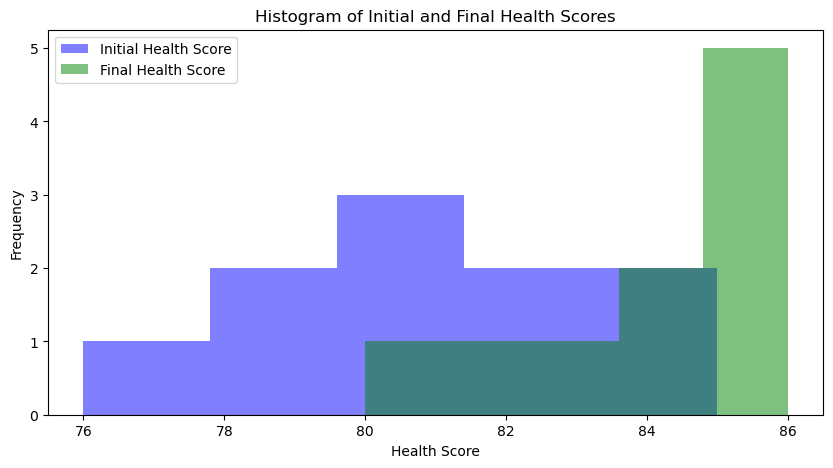

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Plot histograms for InitialHealthScore and FinalHealthScore
plt.figure(figsize=(10, 5))

# Histogram for InitialHealthScore
plt.hist(df['InitialHealthScore'], bins=5, alpha=0.5, label='Initial Health Score', color='blue')

# Histogram for FinalHealthScore
plt.hist(df['FinalHealthScore'], bins=5, alpha=0.5, label='Final Health Score', color='green')

# Add labels and legend
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.title('Histogram of Initial and Final Health Scores')
plt.legend()

# Display the plot
plt.show()


In [7]:
import numpy as np
import pandas as pd

# Creating the DataFrame
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Calculate the mean difference between FinalHealthScore and InitialHealthScore
df["HealthScoreDifference"] = df["FinalHealthScore"] - df["InitialHealthScore"]
mean_diff = df["HealthScoreDifference"].mean()

# Bootstrapping
n_iterations = 10000
bootstrap_means = np.random.choice(df["HealthScoreDifference"], (n_iterations, len(df)), replace=True).mean(axis=1)

# Confidence Interval (95%)
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Checking if H0 is accepted or rejected
h0_rejected = not (confidence_interval[0] <= 0 <= confidence_interval[1])

mean_diff, confidence_interval, h0_rejected


(3.3, array([0.8, 5.5]), True)

Since this confidence interval does not include zero, we reject the null hypothesis. This indicates that there is a statistically significant difference in the health scores before and after the treatment.

Reject H0, the treatment is ineffective.

9. YES